# CS 7641 Assignment 1: Supervised Learning

This Notebook contains answers to CS7641 Assignment 1: Supervised Learning.


It compares and contrasts 5 Supervised Machine Learning classfication algorithms:
- **Decision trees**
- **Boosting**
- **Support vector machines (2 kernels: poly and rbf)**
- **Neural networks**
- **K nearest neighbors**

On 2 Datasets:
- **Wind speed:** https://www.openml.org/d/503 and https://www.openml.org/d/847
- **Customer retaintion:** https://www.openml.org/d/42178

For each algorithm there are following outputs:
- **Model complexity curves:** A model with given number of training instances is trained with different values of hyperparameters and training and cross-validation (CV) scores are plotted against different values of hyperparameters such that complexity of model increases left to right. Typically, as model starts becoming more complex both training score and CV scores improve. But later, as model becomes overly complex CV score decreases while training score keeps on improving, which is an indicator of overfitting. Model complexity curves helps us fine tune the optimal values of hyperparameters such the trained model is complex enough but not too complex.
- **Learning curves:** A model with given values of hyperparameters is trained with increasing number of trainig instances and resulting training and cross-validation (CV) scores and times are plotted as function of number of training instances. Typically, these curves rises sharply initially and then flattens out. These curves helps us understand if and how number of training instances are helping in improving scores and/or times. Which inturn helps us decide if geting new instances for training will improve the model or the hyperparameters needs to be retuned.
- **Out-of-sample model evaluation metrics:** The CV scores are not true estimates of the model performance on unseen data. As CV set itself was used to fine tune hyperpamater values, CV scores are typically overestimates of performance on unseen data. To get a true estimate of model performance on unseen data, a small set of training data is held-out at the beginning and the model performance is reported on this set.

Lastly, outputs from each of the above algorithms are compared based on:
- **Cross validation scores:** CV score for each of the tuned and trained model is plotted as a function of number of training instances. Typically, as number of training instances increases CV scores increases as well. These curves helps us compare the rate of increase of CV scores with number of training instances.
- **Training times:** Training times for each of the tuned and trained model is plotted as a function of number of training instances. Typically, training times also grows with number of training instances. These curves helps us compare the rate of increase of training times with number of training instances. These 2 types of curves together help us understand and strike a balance between model performance and time required.
- **Model evaluation metrics:** Model evaluation metrics for each tuned and trained model is compared. This gives a true estimate of model performance on unseen data.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
pd.options.display.max_columns = None

from helpers import *

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier

%load_ext autoreload
%autoreload 2
%matplotlib inline

#### Notes on implementation:
- To keep this notebook ligible, most of the code is abstracted out in helpers.py and imported in this notebook.
- Following 3 steps are performed on each dataset mentioned above:
    - **Preprocessing:**
        - Data is loaded from csv files downloaded from sources mentioned in README.md.
        - Null values (if any) are handled.
        - LabelEncoding is performed on target variable.
        - OneHotEncoding is performed on categorically variables (if any).
        - StandardScaling is performed on all variables.
        - Data is split in X and y.
        - Data is split in train and test sets.
    - **Machine learning:**
        - 6 models mentioned above are trained on each dataset mentioned above.
        - RandomSearchCV to used to fit hyperparameters.
        - 10-fold cross-valdation (CV) is performed during RandomSearchCV.
        - Model complexity curves are plotted.
        - Learning curves are plotted for the "best" model found.
        - Finally, model evaluation metrics are calculated and printed for out-of-sample held-out set.
    - **Model comparision:**
        - After all 6 machine learning model are successfully trained and tuned; CV scores, training times and evaluation metrics are plotted.

## 1. Wind speed dataset

### 1.a. Preprocessing

In [63]:
df = pd.read_csv("wind.csv", skipinitialspace=True)

In [64]:
df.isnull().sum()

year           0
month          0
day            0
RPT            0
VAL            0
ROS            0
KIL            0
SHA            0
BIR            0
DUB            0
CLA            0
MUL            0
CLO            0
BEL            0
binaryClass    0
dtype: int64

In [65]:
df.head()

,year,month,day,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,binaryClass
0,61,1,1,15.04,14.96,13.17,9.29,13.96,9.87,13.67,10.25,10.83,12.58,18.50,P
1,61,1,2,14.71,16.88,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,P
2,61,1,3,18.50,16.88,12.33,10.13,11.17,6.17,11.25,8.04,8.50,7.67,12.75,P
3,61,1,4,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,P
4,61,1,5,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,P


In [66]:
X = df.drop(['binaryClass'], axis='columns')
y = pd.DataFrame(LabelEncoder().fit_transform(df['binaryClass']))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 1.b. Machine learning

#### 1.b.i. Decision Tree

In [6]:
decision_tree = fit_model([], DecisionTreeClassifier(random_state=42),
                          {'min_samples_split': range(2, 2000, 20)}, X_train, y_train[0])

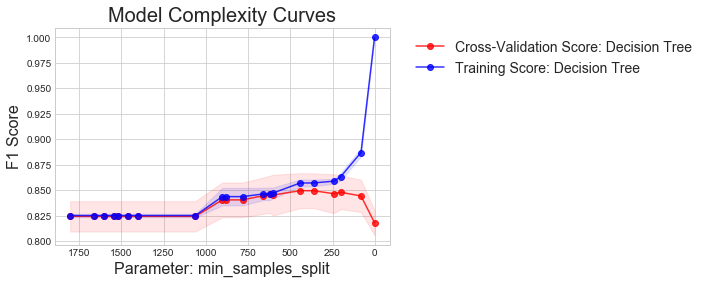

In [7]:
decision_tree_complexity = get_model_complexity(decision_tree, "dsec", "Decision Tree")
plot_model_complexity(decision_tree_complexity, "o-")

#### <center>Fig 1. Model Complexity Curves: Decision Tree</center>

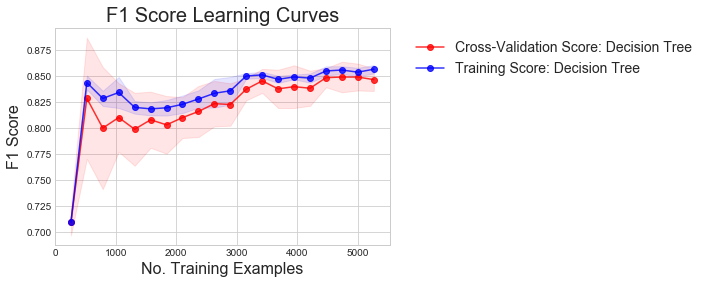

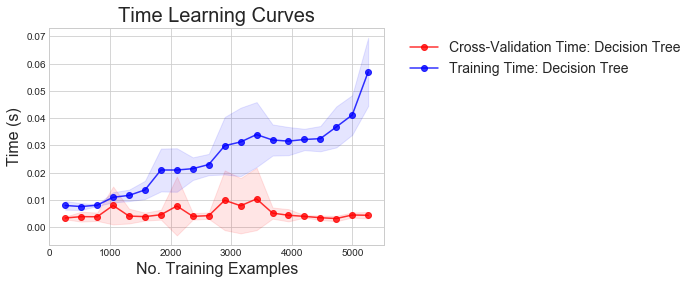

In [8]:
decision_tree_learning_curve = get_learning_curve(decision_tree, X_train, y_train, "Decision Tree")
plot_learning_curve(decision_tree_learning_curve, "o-")

#### <center>Fig 2. Learning Curves: Decision Tree</center>

In [9]:
decision_tree_evaluation_metrics = get_model_evaluation_metrics(decision_tree, X_test, y_test, "Decision Tree")
print_model_evaluation_metrics(decision_tree_evaluation_metrics)

Decision Tree Evaluation Metrics On Out-Of-Sample Test Data
**********************************************************************
F1 Score:  0.84
Accuracy:  0.83     AUC:    0.83
Precision: 0.84     Recall: 0.84
**********************************************************************


#### <center>Table 1. Evaluation Metrics: Decision Tree</center>

#### 1.b.ii. Boosting

In [10]:
boosting = fit_model([], GradientBoostingClassifier(n_estimators=10, random_state=42),
                          {'min_samples_split': range(2, 200, 2)}, X_train, y_train[0])

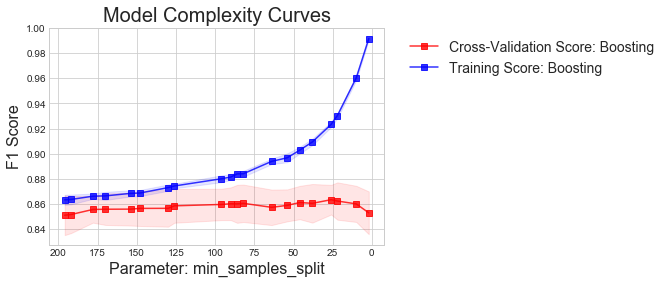

In [11]:
boosting_complexity = get_model_complexity(boosting, "dsec", "Boosting")
plot_model_complexity(boosting_complexity, "s-")

#### <center>Fig 3. Model Complexity Curves: Boosting</center>

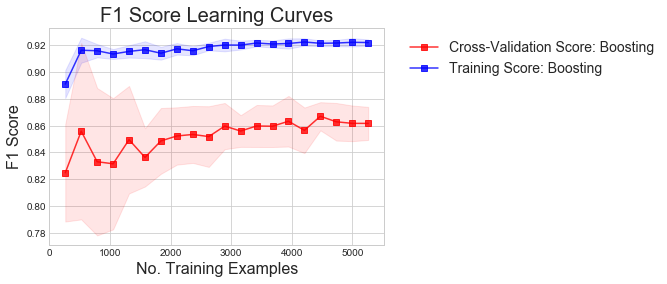

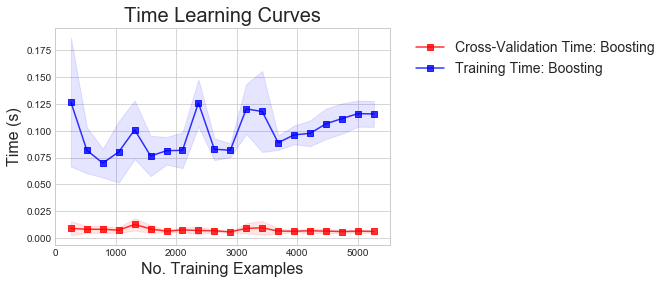

In [12]:
boosting_learning_curve = get_learning_curve(boosting, X_train, y_train, "Boosting")
plot_learning_curve(boosting_learning_curve, "s-")

#### <center>Fig 4. Learning Curves: Boosting</center>

In [13]:
boosting_evaluation_metrics = get_model_evaluation_metrics(boosting, X_test, y_test, "Boosting")
print_model_evaluation_metrics(boosting_evaluation_metrics)

Boosting Evaluation Metrics On Out-Of-Sample Test Data
**********************************************************************
F1 Score:  0.85
Accuracy:  0.85     AUC:    0.85
Precision: 0.85     Recall: 0.86
**********************************************************************


#### <center>Table 2. Evaluation Metrics: Boosting</center>

#### 1.b.iii. SVM (Kernel: poly)

In [14]:
polysvc = fit_model([], SVC(kernel='poly', degree=5, random_state=42),
                {'C': np.linspace(0.0005, 40.0, 500)}, X_train, y_train[0])

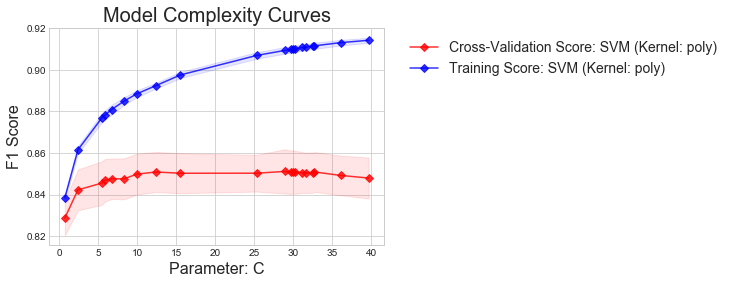

In [15]:
polysvc_complexity = get_model_complexity(polysvc, "asc", "SVM (Kernel: poly)")
plot_model_complexity(polysvc_complexity, "D-")

#### <center>Fig 5. Model Complexity Curves: SVM (Kernel: poly)</center>

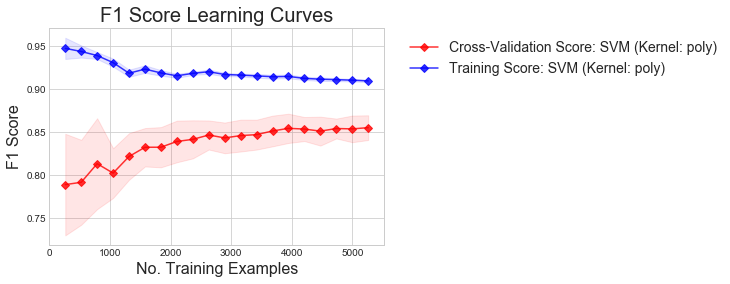

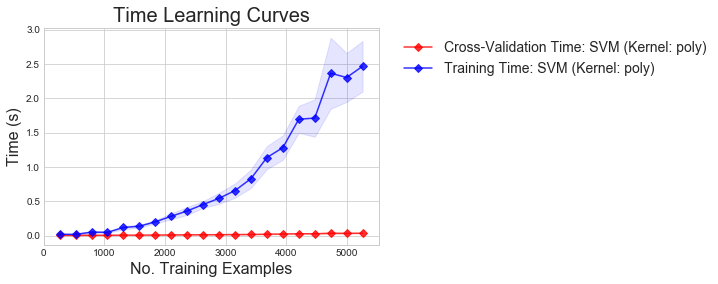

In [16]:
polysvc_learning_curve = get_learning_curve(polysvc, X_train, y_train, "SVM (Kernel: poly)")
plot_learning_curve(polysvc_learning_curve, "D-")

#### <center>Fig 6. Learning Curves: SVM (Kernel: poly)</center>

In [17]:
polysvc_evaluation_metrics = get_model_evaluation_metrics(polysvc, X_test, y_test, "SVM (Kernel: poly)")
print_model_evaluation_metrics(polysvc_evaluation_metrics)

SVM (Kernel: poly) Evaluation Metrics On Out-Of-Sample Test Data
**********************************************************************
F1 Score:  0.85
Accuracy:  0.84     AUC:    0.83
Precision: 0.80     Recall: 0.91
**********************************************************************


#### <center>Table 3. Evaluation Metrics: SVM (Kernel: poly)</center>

#### 1.b.iv. SVM (Kernel: rbf)

In [67]:
rbfsvc = fit_model([], SVC(kernel='rbf', random_state=42),
                {'C': np.linspace(0.0005, 10.0, 500)}, X_train, y_train[0])

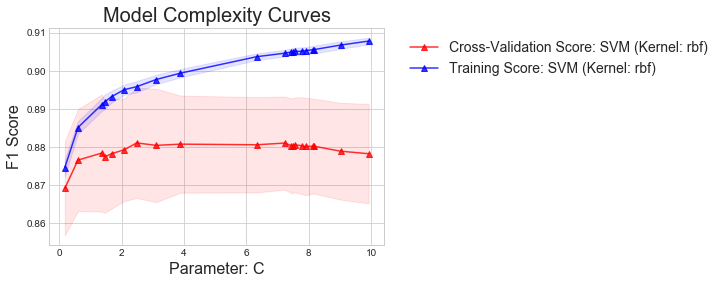

In [19]:
rbfsvc_complexity = get_model_complexity(rbfsvc, "asc", "SVM (Kernel: rbf)")
plot_model_complexity(rbfsvc_complexity, "^-")

#### <center>Fig 7. Model Complexity Curves: SVM (Kernel: rbf)</center>

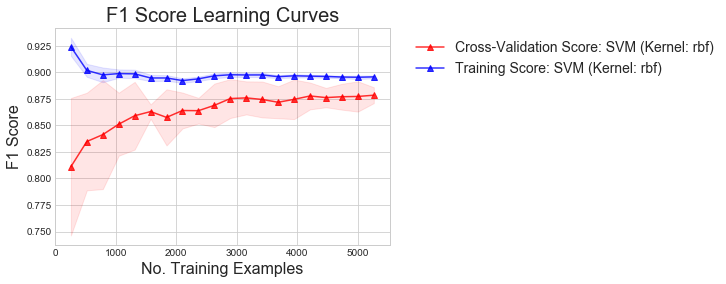

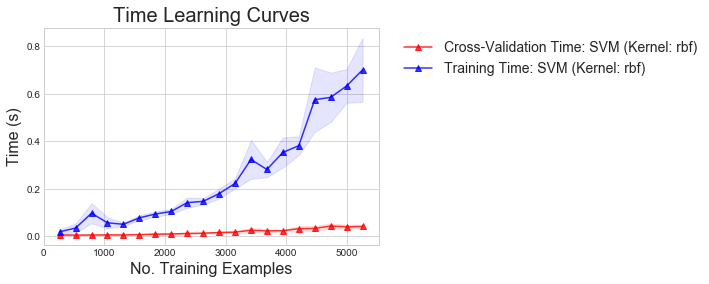

In [68]:
rbfsvc_learning_curve = get_learning_curve(rbfsvc, X_train, y_train, "SVM (Kernel: rbf)")
plot_learning_curve(rbfsvc_learning_curve, "^-")

#### <center>Fig 8. Learning Curves: SVM (Kernel: rbf)</center>

In [21]:
rbfsvc_evaluation_metrics = get_model_evaluation_metrics(rbfsvc, X_test, y_test, "SVM (Kernel: rbf)")
print_model_evaluation_metrics(rbfsvc_evaluation_metrics)

SVM (Kernel: rbf) Evaluation Metrics On Out-Of-Sample Test Data
**********************************************************************
F1 Score:  0.87
Accuracy:  0.86     AUC:    0.86
Precision: 0.86     Recall: 0.87
**********************************************************************


#### <center>Table 4. Evaluation Metrics: SVM (Kernel: rbf)</center>

#### 1.b.v. Neural Network

In [22]:
mlp = fit_model([], MLPClassifier(activation='logistic', learning_rate_init=0.005, max_iter=500, random_state=42),
                {"hidden_layer_sizes": [(s,) for s in range(1, 21, 1)]}, X_train, y_train[0])

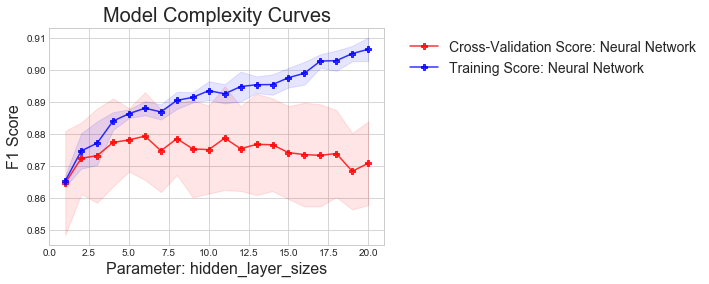

In [23]:
mlp_complexity = get_model_complexity(mlp, "asc", "Neural Network")
plot_model_complexity(mlp_complexity, "P-")

#### <center>Fig 9. Model Complexity Curves: Neural Network</center>

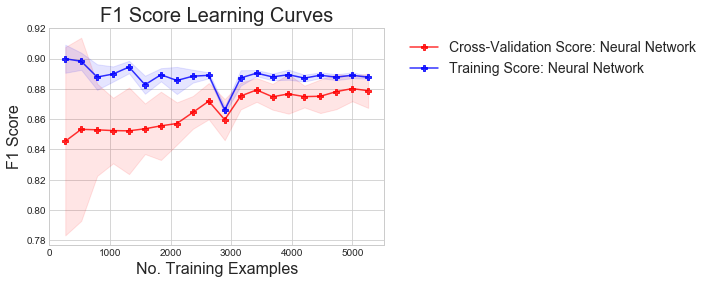

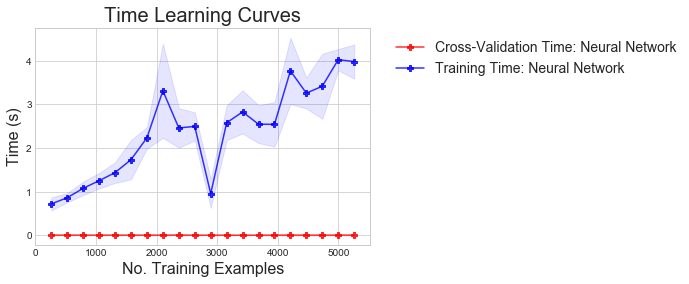

In [24]:
mlp_learning_curve = get_learning_curve(mlp, X_train, y_train, "Neural Network")
plot_learning_curve(mlp_learning_curve, "P-")

#### <center>Fig 10. Learning Curves: Neural Network</center>

In [25]:
mlp_evaluation_metrics = get_model_evaluation_metrics(mlp, X_test, y_test, "Neural Network")
print_model_evaluation_metrics(mlp_evaluation_metrics)

Neural Network Evaluation Metrics On Out-Of-Sample Test Data
**********************************************************************
F1 Score:  0.87
Accuracy:  0.86     AUC:    0.86
Precision: 0.86     Recall: 0.87
**********************************************************************


#### <center>Table 5. Evaluation Metrics: Neural Network</center>

#### 1.b.vi. K Nearest Neighbors

In [26]:
knn = fit_model([], KNeighborsClassifier(n_jobs=-1), {'n_neighbors': range(1, 100)}, X_train, y_train[0])

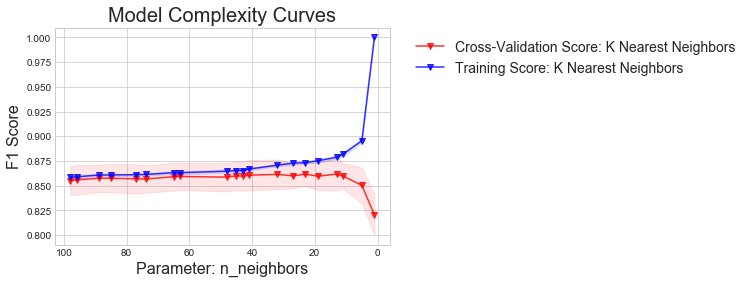

In [27]:
knn_complexity = get_model_complexity(knn, "dsec", "K Nearest Neighbors")
plot_model_complexity(knn_complexity, "v-")

#### <center>Fig 11. Model Complexity Curves: K Nearest Neighbors</center>

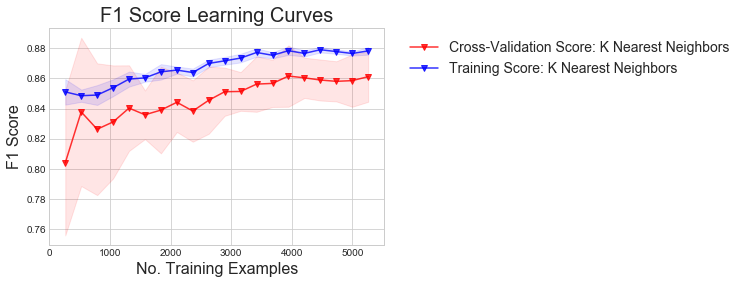

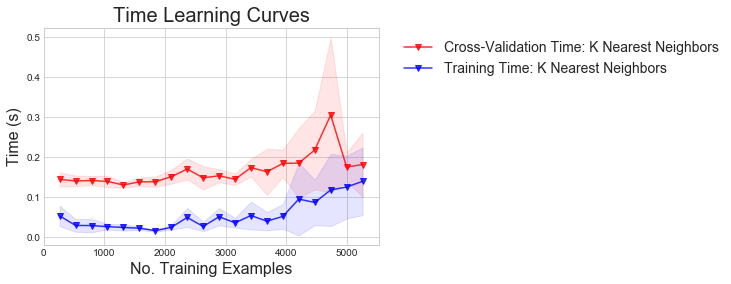

In [28]:
knn_learning_curve = get_learning_curve(knn, X_train, y_train, "K Nearest Neighbors")
plot_learning_curve(knn_learning_curve, "v-")

#### <center>Fig 12. Learning Curves: K Nearest Neighbors</center>

#### Note: Cross-validation time is more than training time for KNN, which is atypical of any other algorithm we studied here.

In [29]:
knn_evaluation_metrics = get_model_evaluation_metrics(knn, X_test, y_test, "K Nearest Neighbors")
print_model_evaluation_metrics(knn_evaluation_metrics)

K Nearest Neighbors Evaluation Metrics On Out-Of-Sample Test Data
**********************************************************************
F1 Score:  0.86
Accuracy:  0.85     AUC:    0.85
Precision: 0.84     Recall: 0.88
**********************************************************************


#### <center>Table 6. Evaluation Metrics: K Nearest Neighbors</center>

### 1.c. Model Comparisions

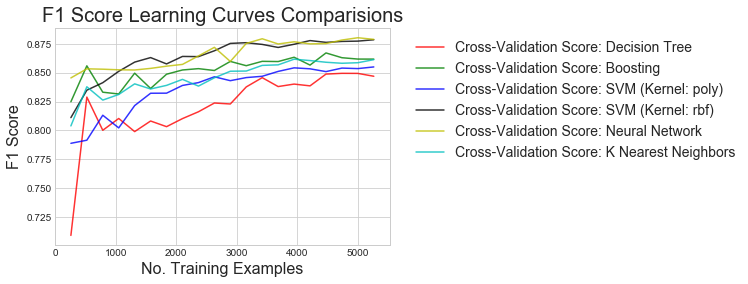

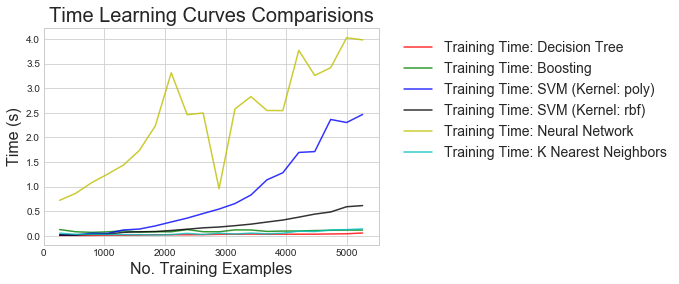

In [30]:
plot_learning_curve_comparision([decision_tree_learning_curve,
                                 boosting_learning_curve,
                                 polysvc_learning_curve,
                                 rbfsvc_learning_curve,
                                 mlp_learning_curve,
                                 knn_learning_curve])

#### <center>Fig 13. Model Comparisions</center>

In [31]:
print_model_evaluation_metrics_comparision([decision_tree_evaluation_metrics,
                                            boosting_evaluation_metrics,
                                            polysvc_evaluation_metrics,
                                            rbfsvc_evaluation_metrics,
                                            mlp_evaluation_metrics,
                                            knn_evaluation_metrics])

            model_name       auc        f1  accuracy  precision    recall
0        Decision Tree  0.833357  0.839089  0.833460   0.842183  0.836018
1             Boosting  0.845979  0.852770  0.846388   0.849057  0.856515
2   SVM (Kernel: poly)  0.833568  0.852437  0.836502   0.802326  0.909224
3    SVM (Kernel: rbf)  0.861270  0.867153  0.861597   0.864629  0.869693
4       Neural Network  0.859511  0.866473  0.860076   0.858993  0.874085
5  K Nearest Neighbors  0.852886  0.862464  0.853992   0.844320  0.881406


#### <center>Table 7. Evaluation Metrics Comparisions</center>

## 2. Customer retaintion dataset

### 2.a. Data load and preprocessing

In [32]:
df = pd.read_csv("customer.csv", skipinitialspace=True)

In [33]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [34]:
df = df.dropna()
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


#### Note: Since there are only 11 rows that has null values, they are dropped to handle missing values.

In [35]:
X = df.drop(['customerID', "Churn"], axis='columns')
y = pd.DataFrame(LabelEncoder().fit_transform(df['Churn']))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 2.b. Machine learning

#### 2.b.i. Decision Tree

In [36]:
decision_tree = fit_model(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod'], DecisionTreeClassifier(random_state=42),
                          {'min_samples_split': range(2, 2000, 20)}, X_train, y_train[0])

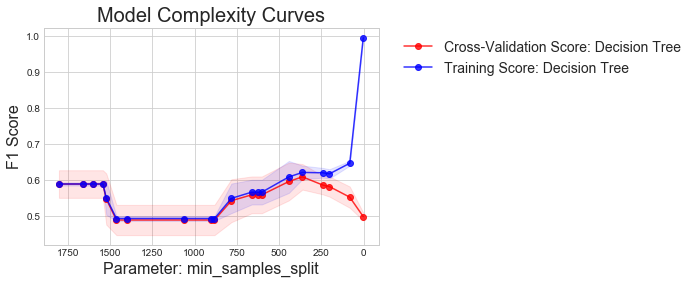

In [37]:
decision_tree_complexity = get_model_complexity(decision_tree, "dsec", "Decision Tree")
plot_model_complexity(decision_tree_complexity, "o-")

#### <center>Fig 14. Model Complexity Curves: Decision Tree</center>

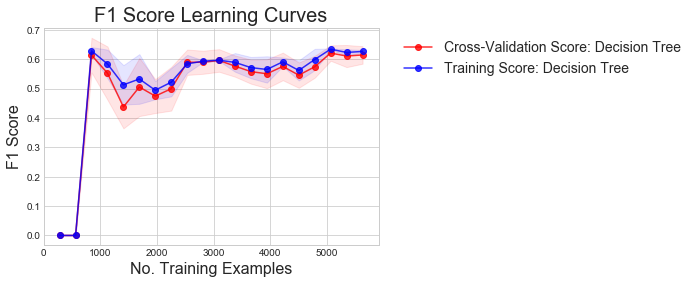

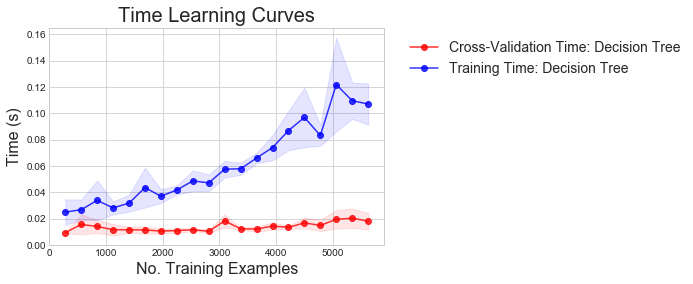

In [38]:
decision_tree_learning_curve = get_learning_curve(decision_tree, X_train, y_train, "Decision Tree")
plot_learning_curve(decision_tree_learning_curve, "o-")

#### <center>Fig 15. Learning Curves: Decision Tree</center>

In [39]:
decision_tree_evaluation_metrics = get_model_evaluation_metrics(decision_tree, X_test, y_test, "Decision Tree")
print_model_evaluation_metrics(decision_tree_evaluation_metrics)

Decision Tree Evaluation Metrics On Out-Of-Sample Test Data
**********************************************************************
F1 Score:  0.58
Accuracy:  0.78     AUC:    0.71
Precision: 0.60     Recall: 0.56
**********************************************************************


#### <center>Table 8. Evaluation Metrics: Decision Tree</center>

#### 2.b.ii. Boosting

In [40]:
boosting = fit_model(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod'], GradientBoostingClassifier(n_estimators=10, random_state=42),
                          {'min_samples_split': range(2, 200, 2)}, X_train, y_train[0])

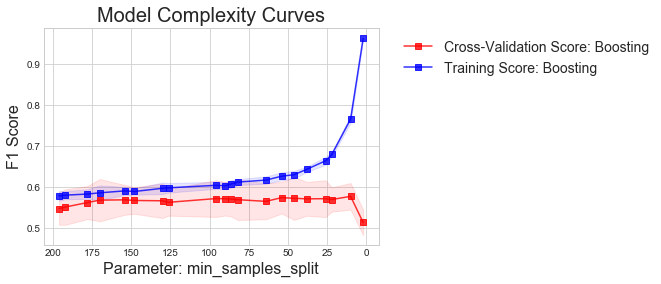

In [41]:
boosting_complexity = get_model_complexity(boosting, "dsec", "Boosting")
plot_model_complexity(boosting_complexity, "s-")

#### <center>Fig 16. Model Complexity Curves: Boosting</center>

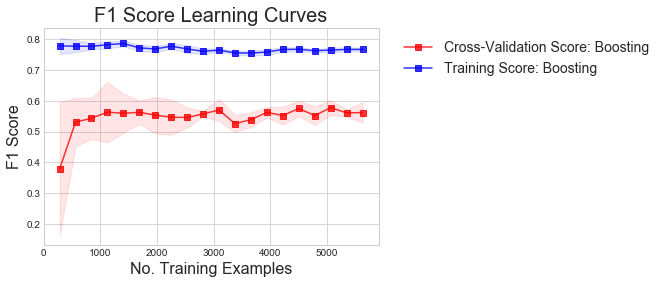

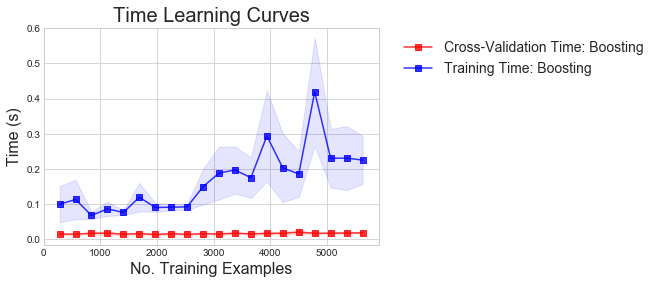

In [42]:
boosting_learning_curve = get_learning_curve(boosting, X_train, y_train, "Boosting")
plot_learning_curve(boosting_learning_curve, "s-")

#### <center>Fig 17. Learning Curves: Boosting</center>

In [43]:
boosting_evaluation_metrics = get_model_evaluation_metrics(boosting, X_test, y_test, "Boosting")
print_model_evaluation_metrics(boosting_evaluation_metrics)

Boosting Evaluation Metrics On Out-Of-Sample Test Data
**********************************************************************
F1 Score:  0.55
Accuracy:  0.79     AUC:    0.69
Precision: 0.64     Recall: 0.49
**********************************************************************


#### <center>Table 9. Evaluation Metrics: Boosting</center>

#### 2.b.iii. SVM (Kernel: poly)

In [44]:
polysvc = fit_model(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod'], SVC(kernel='poly', degree=5, random_state=42),
                {'C': np.linspace(0.0005, 5.0, 500)}, X_train, y_train[0])

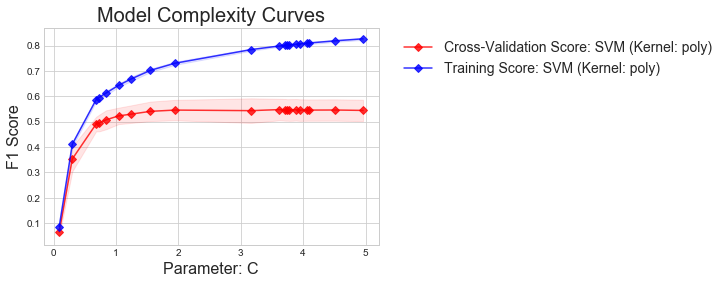

In [45]:
polysvc_complexity = get_model_complexity(polysvc, "asc", "SVM (Kernel: poly)")
plot_model_complexity(polysvc_complexity, "D-")

#### <center>Fig 18. Model Complexity Curves: SVM (Kernel: poly)</center>

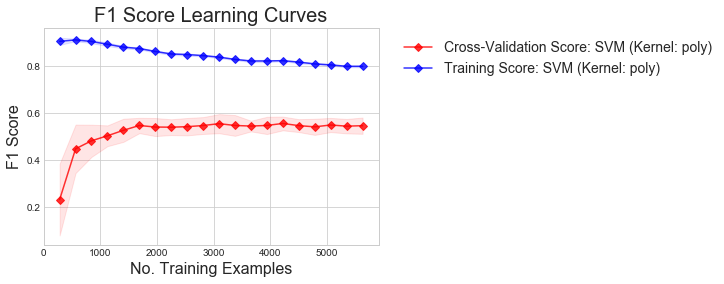

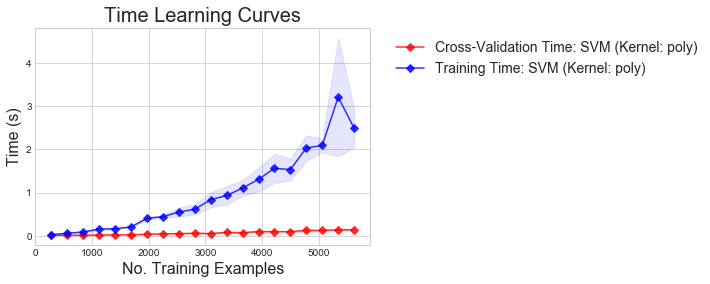

In [46]:
polysvc_learning_curve = get_learning_curve(polysvc, X_train, y_train, "SVM (Kernel: poly)")
plot_learning_curve(polysvc_learning_curve, "D-")

#### <center>Fig 19. Learning Curves: SVM (Kernel: poly)</center>

In [47]:
polysvc_evaluation_metrics = get_model_evaluation_metrics(polysvc, X_test, y_test, "SVM (Kernel: poly)")
print_model_evaluation_metrics(polysvc_evaluation_metrics)

SVM (Kernel: poly) Evaluation Metrics On Out-Of-Sample Test Data
**********************************************************************
F1 Score:  0.53
Accuracy:  0.76     AUC:    0.68
Precision: 0.54     Recall: 0.51
**********************************************************************


#### <center>Table 10. Evaluation Metrics: SVM (Kernel: poly)</center>

#### 2.b.iv. SVM (Kernel: rbf)

In [48]:
rbfsvc = fit_model(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod'], SVC(kernel='rbf', random_state=42),
                {'C': np.linspace(0.0005, 5.0, 500)}, X_train, y_train[0])

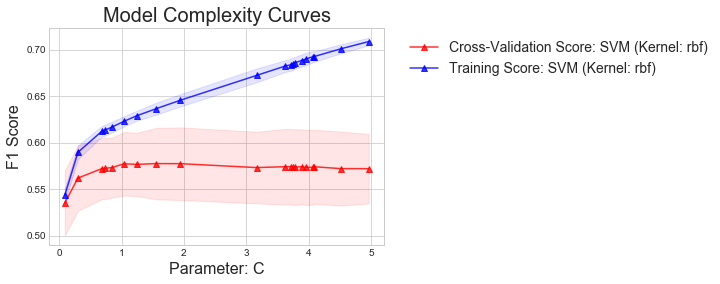

In [49]:
rbfsvc_complexity = get_model_complexity(rbfsvc, "asc", "SVM (Kernel: rbf)")
plot_model_complexity(rbfsvc_complexity, "^-")

#### <center>Fig 20. Model Complexity Curves: SVM (Kernel: rbf)</center>

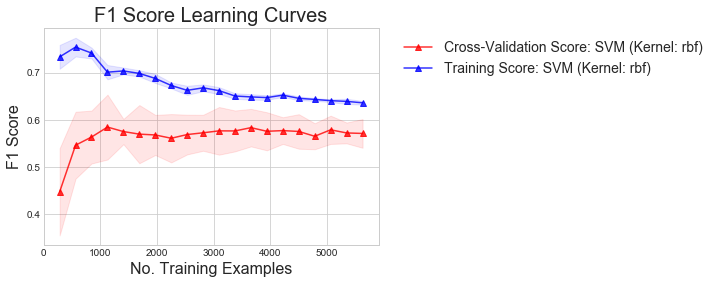

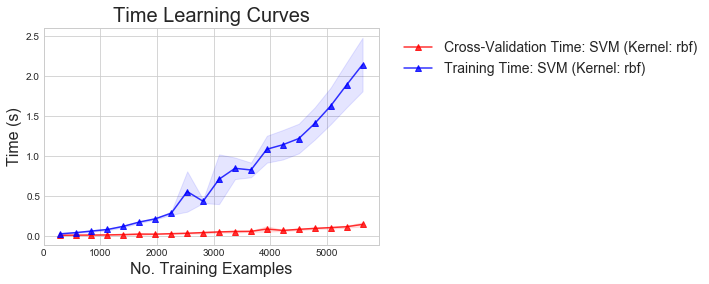

In [62]:
rbfsvc_learning_curve = get_learning_curve(rbfsvc, X_train, y_train, "SVM (Kernel: rbf)")
plot_learning_curve(rbfsvc_learning_curve, "^-")

#### <center>Fig 21. Learning Curves: SVM (Kernel: rbf)</center>

In [51]:
rbfsvc_evaluation_metrics = get_model_evaluation_metrics(rbfsvc, X_test, y_test, "SVM (Kernel: rbf)")
print_model_evaluation_metrics(rbfsvc_evaluation_metrics)

SVM (Kernel: rbf) Evaluation Metrics On Out-Of-Sample Test Data
**********************************************************************
F1 Score:  0.55
Accuracy:  0.79     AUC:    0.69
Precision: 0.62     Recall: 0.48
**********************************************************************


#### <center>Table 11. Evaluation Metrics: SVM (Kernel: rbf)</center>

#### 2.b.v. Neural Network

In [52]:
mlp = fit_model(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod'], MLPClassifier(activation='logistic', learning_rate_init=0.002, max_iter=500, random_state=42),
                {"hidden_layer_sizes": [(s,) for s in range(1, 21, 1)]}, X_train, y_train[0])

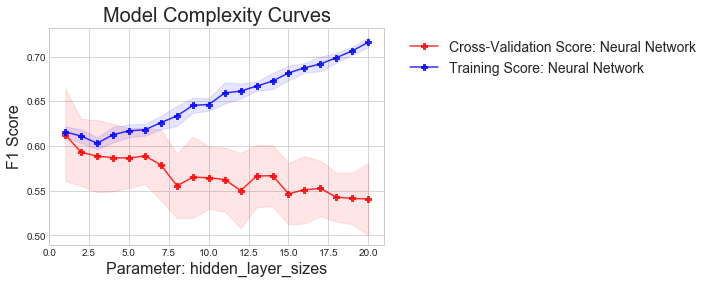

In [53]:
mlp_complexity = get_model_complexity(mlp, "asc", "Neural Network")
plot_model_complexity(mlp_complexity, "P-")

#### <center>Fig 22. Model Complexity Curves: Neural Network</center>

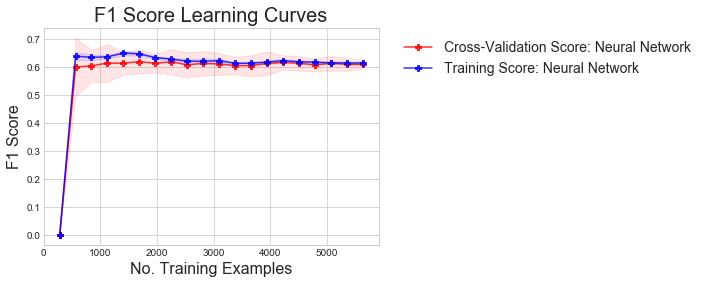

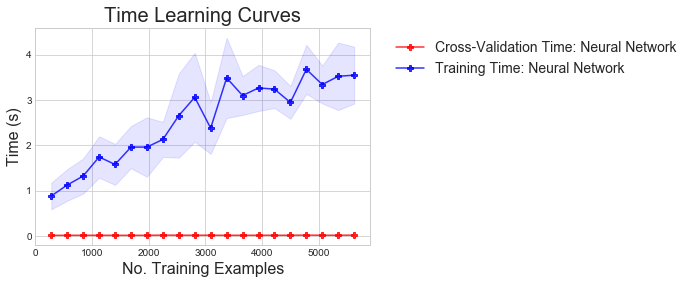

In [54]:
mlp_learning_curve = get_learning_curve(mlp, X_train, y_train, "Neural Network")
plot_learning_curve(mlp_learning_curve, "P-")

#### <center>Fig 23. Learning Curves: Neural Network</center>

In [55]:
mlp_evaluation_metrics = get_model_evaluation_metrics(mlp, X_test, y_test, "Neural Network")
print_model_evaluation_metrics(mlp_evaluation_metrics)

Neural Network Evaluation Metrics On Out-Of-Sample Test Data
**********************************************************************
F1 Score:  0.58
Accuracy:  0.79     AUC:    0.71
Precision: 0.61     Recall: 0.55
**********************************************************************


#### <center>Table 12. Evaluation Metrics: Neural Network</center>

#### 2.b.vi. K Nearest Neighbors

In [56]:
knn = fit_model(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod'], KNeighborsClassifier(n_jobs=-1),
                {'n_neighbors': range(1, 140)}, X_train, y_train[0])

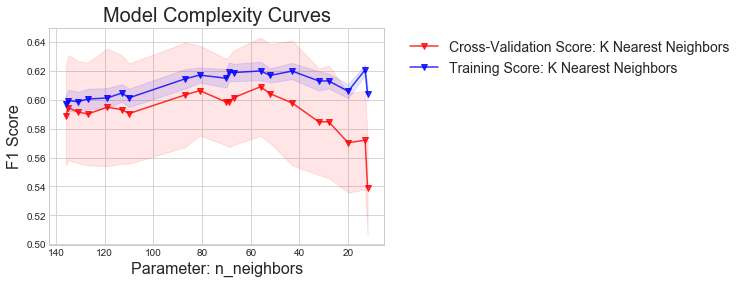

In [57]:
knn_complexity = get_model_complexity(knn, "dsec", "K Nearest Neighbors")
plot_model_complexity(knn_complexity, "v-")

#### <center>Fig 24. Model Complexity Curves: K Nearest Neighbors</center>

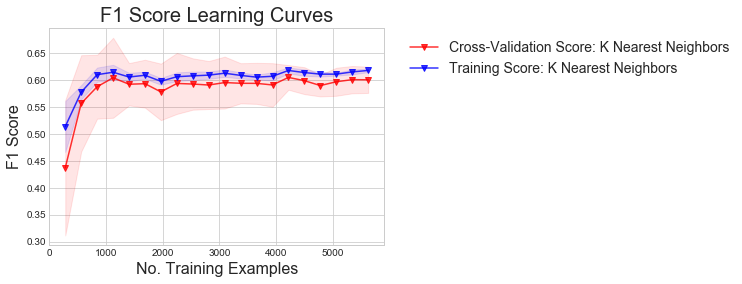

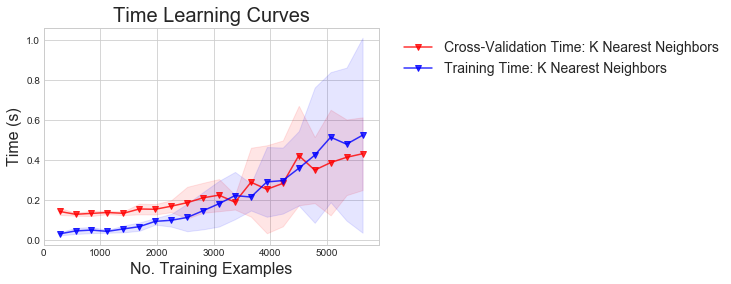

In [58]:
knn_learning_curve = get_learning_curve(knn, X_train, y_train, "K Nearest Neighbors")
plot_learning_curve(knn_learning_curve, "v-")

#### <center>Fig 25. Learning Curves: K Nearest Neighbors</center>

#### Note: Cross-validation time is more than training time for KNN, which is atypical of any other algorithm we studied here.

In [59]:
knn_evaluation_metrics = get_model_evaluation_metrics(knn, X_test, y_test, "K Nearest Neighbors")
print_model_evaluation_metrics(knn_evaluation_metrics)

K Nearest Neighbors Evaluation Metrics On Out-Of-Sample Test Data
**********************************************************************
F1 Score:  0.58
Accuracy:  0.78     AUC:    0.71
Precision: 0.58     Recall: 0.57
**********************************************************************


#### <center>Table 13. Evaluation Metrics: K Nearest Neighbors</center>

### 2.c. Model Comparisions

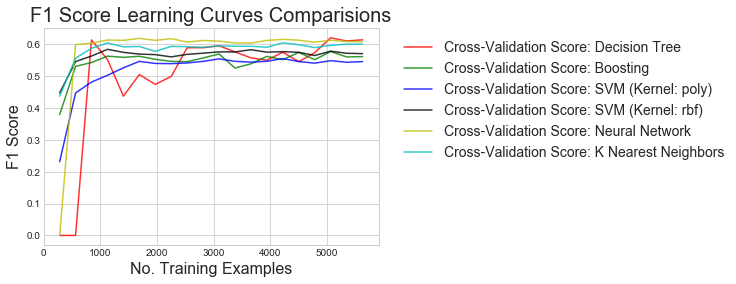

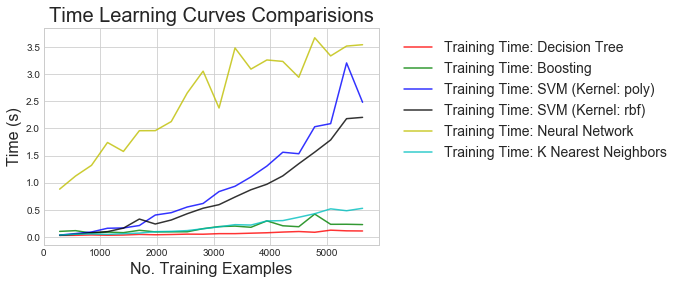

In [60]:
plot_learning_curve_comparision([decision_tree_learning_curve,
                                 boosting_learning_curve,
                                 polysvc_learning_curve,
                                 rbfsvc_learning_curve,
                                 mlp_learning_curve,
                                 knn_learning_curve])

#### <center>Fig 26. Model Comparisions</center>

In [61]:
print_model_evaluation_metrics_comparision([decision_tree_evaluation_metrics,
                                            boosting_evaluation_metrics,
                                            polysvc_evaluation_metrics,
                                            rbfsvc_evaluation_metrics,
                                            mlp_evaluation_metrics,
                                            knn_evaluation_metrics])

            model_name       auc        f1  accuracy  precision    recall
0        Decision Tree  0.712017  0.578512  0.782516   0.596591  0.561497
1             Boosting  0.693461  0.552352  0.790334   0.638596  0.486631
2   SVM (Kernel: poly)  0.677050  0.525588  0.756219   0.544413  0.508021
3    SVM (Kernel: rbf)  0.689220  0.545181  0.785359   0.624138  0.483957
4       Neural Network  0.711141  0.578279  0.787491   0.611940  0.548128
5  K Nearest Neighbors  0.712409  0.577957  0.776830   0.581081  0.574866


#### <center>Table 14. Evaluation Metrics Comparisions</center>

## 3. Conclusions

#### Following comclusions can be drawn after analysing 6 different model on 2 data sets, mentioned above:
- As model complexity increases, both training scores and CV scores improves. But later, as model becomes too complex CV score decreases while training score keeps on improving. This is point where the model starts overfitting **(Figs. 1, 3, 5, 7, 9, 11, 14, 16, 18, 20, 22 and 24)**. This is true for all algorithms across both datasets.
- Initially, CV score learning curves sharply rise indicating improvements resulted from new training instances. After a few 1000s of training instances a point is reached after which negligible improvments in CV scores is observed **(Figs. 2, 4, 6, 8, 10, 12, 15, 17, 19, 21, 23 and 25)**. This is true for all algorithms across both datasets.
- Training time learning curves also rise with number of training instances. **(Figs. 2, 4, 6, 8, 10, 12, 15, 17, 19, 21, 23 and 25)**. But the rate of increase is different for different algorithms. SVM (both poly and rbf kernels) and Nerural Network seems to be polynomial whereas other look like linear in number of training instances **(Figs. 13 and 26)**.
- As more number of training instances are added, the algorithm used becomes irrelavant. This is evident from the fact that the CV scores and model performance on unseen data is almost equal for all the algorithms across both the datasets **(Figs. 13 and 26) and (Tables. 7 and 14)**.
- 10-fold CV leads to good generalization over unseen data, as model performance over unseen data for each model above is almost same as CV score for that model **(Tables. 1, 2, 3, 4, 5, 6, 8, 9, 10, 11, 12 and 13)**.
- Performing feature selection can help in imporving CV scores decreasing training times.
- Better hyperparameters can be found by doing more exhaustive grid search over multiple hyperparameters. But doing so would be time consuming.